In [1]:
import re
import pandas as pd

In [2]:
cbt = pd.read_csv("CBTweets.csv")
cbt

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


## clean the tweets

In [3]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text.lower().strip()

In [4]:
cbt['clean_tweet'] = cbt['tweet_text'].apply(clean_text)
cbt

,tweet_text,cyberbullying_type,clean_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is aussietv so white mkr theblock imaceleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,a classy whore or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks for the heads up but not too con...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,this is an isis account pretending to be a kur...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl arent expected to do anything depend...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner did not withhold his disappointment tur...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,i swear to god this dumb nigger bitch i have g...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck you rt if youre a nigger fucking unf...


## Analyse tweets distribution

In [5]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1196232b0>,
 [Text(0.9508355714410492, 0.5530928638866838, 'religion'),
  Text(-0.01028916176317723, 1.0999518776520232, 'age'),
  Text(-0.9601331911301171, 0.5367906997054793, 'gender'),
  Text(-0.9435780735451691, -0.5653851953533872, 'ethnicity'),
  Text(0.018476441039215755, -1.0998448168385049, 'not_cyberbullying'),
  Text(0.9571482463400841, -0.5420952264391395, 'other_cyberbullying')],
 [Text(0.5186375844223904, 0.3016870166654639, '16.77%'),
  Text(-0.005612270052642124, 0.5999737514465581, '16.76%'),
  Text(-0.5237090133437002, 0.2927949271120796, '16.72%'),
  Text(-0.5146789492064558, -0.30839192473821114, '16.69%'),
  Text(0.01007805874866314, -0.5999153546391844, '16.66%'),
  Text(0.5220808616400459, -0.2956883053304397, '16.40%')])

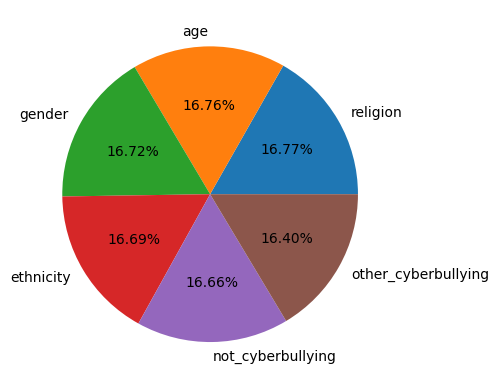

In [6]:
type_col = cbt.cyberbullying_type.value_counts()

plt.pie(type_col,labels = type_col.index,autopct = "%.2f%%")

# plt.savefig('cbt_pie.png', transparent=True)

#### * Tokenize tweets and plot distribution
- num_words=5000, oov_token="<OOV>": shows words output more then 5000 times, less then 5000 times will be OOV(out of vocabulary)

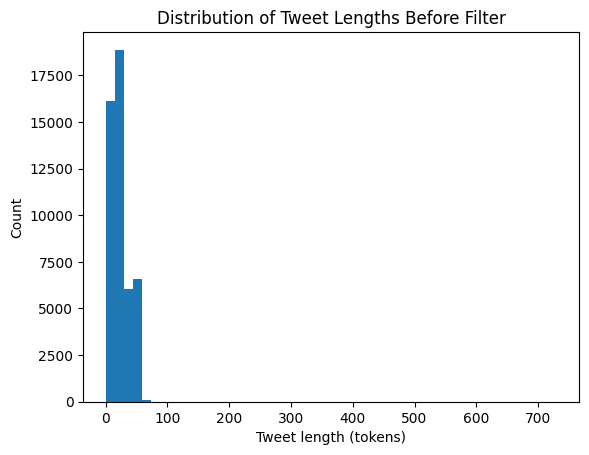

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

# build tokenizer 
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(cbt['clean_tweet'])  # build dictionary

# transform each tweet into sequences
sequences = tokenizer.texts_to_sequences(cbt['clean_tweet'])

# calculate the token length of each tweet
tweet_lengths = [len(seq) for seq in sequences]

# plot
plt.hist(tweet_lengths, bins=50)
plt.xlabel('Tweet length (tokens)')
plt.ylabel('Count')
plt.title('Distribution of Tweet Lengths Before Filter')

# plt.savefig('tweet_length.png', transparent=True)
plt.show()

#### * check the distribution 

In [8]:
import numpy as np

mean = np.mean(tweet_lengths)
median = np.median(tweet_lengths)
q1 = np.percentile(tweet_lengths, 25)
q3 = np.percentile(tweet_lengths, 75)
minimum = np.min(tweet_lengths)
maximum = np.max(tweet_lengths)

# Display the results
print("Mean:", mean)
print("Median:", median)
print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)
print("Minimum:", minimum)
print("Maximum:", maximum)

Mean: 22.72389499287092
Median: 19.0
Q1 (25th percentile): 12.0
Q3 (75th percentile): 32.0
Minimum: 0
Maximum: 730


In [9]:
from collections import Counter

count = Counter(tweet_lengths)

# decend the token number of each tweet
sorted_count = dict(sorted(count.items(), key=lambda item: item[0], reverse=True))

sorted_count

{730: 1,
 642: 1,
 469: 1,
 313: 1,
 272: 1,
 270: 1,
 266: 1,
 216: 1,
 205: 1,
 196: 1,
 195: 1,
 187: 1,
 176: 1,
 148: 1,
 124: 1,
 119: 1,
 113: 1,
 94: 1,
 75: 1,
 65: 1,
 64: 3,
 63: 1,
 62: 5,
 61: 19,
 60: 20,
 59: 25,
 58: 37,
 57: 87,
 56: 154,
 55: 189,
 54: 288,
 53: 338,
 52: 428,
 51: 512,
 50: 572,
 49: 667,
 48: 685,
 47: 702,
 46: 692,
 45: 636,
 44: 610,
 43: 550,
 42: 542,
 41: 455,
 40: 483,
 39: 426,
 38: 472,
 37: 435,
 36: 404,
 35: 402,
 34: 384,
 33: 366,
 32: 370,
 31: 361,
 30: 379,
 29: 423,
 28: 521,
 27: 642,
 26: 824,
 25: 1060,
 24: 1172,
 23: 1362,
 22: 1533,
 21: 1586,
 20: 1731,
 19: 1640,
 18: 1635,
 17: 1619,
 16: 1579,
 15: 1547,
 14: 1642,
 13: 1588,
 12: 1481,
 11: 1452,
 10: 1336,
 9: 1355,
 8: 1279,
 7: 1139,
 6: 1067,
 5: 960,
 4: 798,
 3: 661,
 2: 515,
 1: 540,
 0: 286}

#### * We decide to filter out the tweet that is over 200 tokens

In [10]:
# from tensorflow.keras.preprocessing.text import Tokenizer

# # build tokenizer as before
# tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
# tokenizer.fit_on_texts(cbt['clean_tweet'])  # 建立詞典

# # transform each tweet into sequences as before
# sequences = tokenizer.texts_to_sequences(cbt['clean_tweet'])

# # calculate the token length of each tweet as before
# tweet_lengths = [len(seq) for seq in sequences]

# filter out the tweet that has over 200 tokens of words
# filtered_sequences = [seq for seq in sequences if len(seq) <= 200]
filtered_sequences = [seq for seq in sequences if 0 < len(seq) <= 200]

# turn token of words back to tweets if needed
# filtered_tweets = [cbt['clean_tweet'][i] for i, seq in enumerate(sequences) if len(seq) <= 200]

print("number of tweets after filter:", len(filtered_sequences))

number of tweets after filter: 47397


Maximum tweet length in filtered sequences: 196


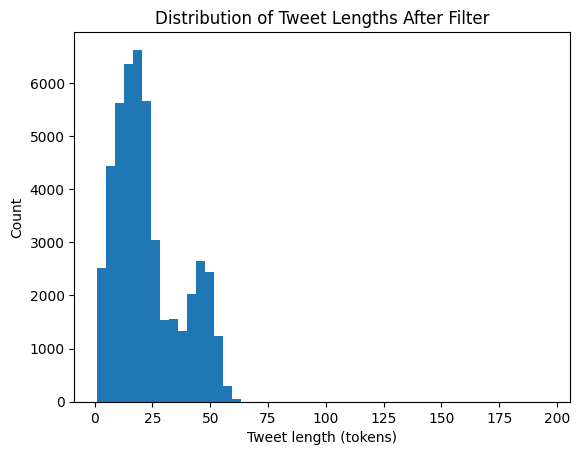

In [11]:
# plot the tweets after filter

# count tweet token length
tweet_lengths_clean = [len(seq) for seq in filtered_sequences]

print("Maximum tweet length in filtered sequences:", max(tweet_lengths_clean))

plt.hist(tweet_lengths_clean, bins=50)
plt.xlabel('Tweet length (tokens)')
plt.ylabel('Count')
plt.title('Distribution of Tweet Lengths After Filter')

# plt.savefig('tweet_length_clean.png', transparent=True)
plt.show()

### Get the new tweets that has less then 200 words 

In [12]:
## create new df to store tweet length <= 200

# filtered index
filtered_idx = [i for i, seq in enumerate(sequences) if len(seq) <= 200]

# based on index get original tweet & label
cbt_df = cbt.iloc[filtered_idx].reset_index(drop=True)

print("number of tweets after filter:", len(cbt_df))

cbt_df.head()

number of tweets after filter: 47683


,tweet_text,cyberbullying_type,clean_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is aussietv so white mkr theblock imaceleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,a classy whore or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks for the heads up but not too con...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,this is an isis account pretending to be a kur...


### Do Decision Tree / SVM / Logistic Regression Models
- First we apply TF-IDF to remove stop words
- Than we fix the traning / testing datasets

In [13]:
## TF-IDF transform (remove stop words)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with English stopwords
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the clean text
x2 = vectorizer.fit_transform(cbt_df['clean_tweet'])
y2 = cbt_df['cyberbullying_type']

# View the resulting dense matrix
print(x2.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
## FIX the train test split
from sklearn.model_selection import train_test_split

# split the data with random state being 42
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Define model and hyperparameters
dt_model = DecisionTreeClassifier()
dt_params = {
    "criterion": ["entropy"],
    "max_depth": [None, 10, 30],
}

# Grid Search
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True)
dt_grid.fit(x2_train, y2_train)

# Predictions
dt_best = dt_grid.best_estimator_
dt_preds = dt_best.predict(x2_test)

# Evaluation
print("\n🌳 --- Decision Tree ---")
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Test Accuracy: {accuracy_score(y2_test, dt_preds):.4f}")
print(f"CV Accuracy: {dt_grid.best_score_:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y2_test, dt_preds))
print("Classification Report:\n", classification_report(y2_test, dt_preds))


Fitting 5 folds for each of 3 candidates, totalling 15 fits

🌳 --- Decision Tree ---
Best Parameters: {'criterion': 'entropy', 'max_depth': 30}
Test Accuracy: 0.7945
CV Accuracy: 0.7932
Confusion Matrix:
 [[1527    4    1   27   44    2]
 [   4 1533    3   10   44    7]
 [   1    9 1184   72  260    6]
 [   7    5   58  461 1060   32]
 [   1    5   49   82 1436    2]
 [   1    8    8   14  134 1436]]
Classification Report:
                      precision    recall  f1-score   support

                age       0.99      0.95      0.97      1605
          ethnicity       0.98      0.96      0.97      1601
             gender       0.91      0.77      0.84      1532
  not_cyberbullying       0.69      0.28      0.40      1623
other_cyberbullying       0.48      0.91      0.63      1575
           religion       0.97      0.90      0.93      1601

           accuracy                           0.79      9537
          macro avg       0.84      0.80      0.79      9537
       weighted avg  

In [16]:
## SVM
from sklearn.svm import LinearSVC

# Define model and hyperparameters
svm_model = LinearSVC(dual=False, max_iter=1000)  # dual=False is needed for l1/l2
svm_params = {
    "C": [0.1, 1, 10],
    "penalty": ["l2"]  # Only 'l2' is supported for LinearSVC in this setting
}

# Grid Search
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True)
svm_grid.fit(x2_train, y2_train)

# Predictions
svm_best = svm_grid.best_estimator_
svm_preds = svm_best.predict(x2_test)

# Evaluation
print("\n⚙️ --- Linear SVM ---")
print(f"Best Parameters: {svm_grid.best_params_}")
print(f"Test Accuracy: {accuracy_score(y2_test, svm_preds):.4f}")
print(f"CV Accuracy: {svm_grid.best_score_:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y2_test, svm_preds))
print("Classification Report:\n", classification_report(y2_test, svm_preds))

Fitting 5 folds for each of 3 candidates, totalling 15 fits

⚙️ --- Linear SVM ---
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Test Accuracy: 0.8185
CV Accuracy: 0.8201
Confusion Matrix:
 [[1562    2    3   15   22    1]
 [   3 1556    6    8   23    5]
 [  10   11 1254  124  124    9]
 [  69   14   50  847  581   62]
 [  16   26   58  387 1060   28]
 [   0    9    2   35   28 1527]]
Classification Report:
                      precision    recall  f1-score   support

                age       0.94      0.97      0.96      1605
          ethnicity       0.96      0.97      0.97      1601
             gender       0.91      0.82      0.86      1532
  not_cyberbullying       0.60      0.52      0.56      1623
other_cyberbullying       0.58      0.67      0.62      1575
           religion       0.94      0.95      0.94      1601

           accuracy                           0.82      9537
          macro avg       0.82      0.82      0.82      9537
       weighted avg       0.82      0

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Define model and hyperparameters
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)
logreg_params = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"]
}

# Grid Search
logreg_grid = GridSearchCV(logreg_model, logreg_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True)
logreg_grid.fit(x2_train, y2_train)

# Predictions
logreg_best = logreg_grid.best_estimator_
logreg_preds = logreg_best.predict(x2_test)

# Evaluation
print("\n📈 --- Logistic Regression ---")
print(f"Best Parameters: {logreg_grid.best_params_}")
print(f"Test Accuracy: {accuracy_score(y2_test, logreg_preds):.4f}")
print(f"CV Accuracy: {logreg_grid.best_score_:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y2_test, logreg_preds))
print("Classification Report:\n", classification_report(y2_test, logreg_preds))


Fitting 5 folds for each of 6 candidates, totalling 30 fits

📈 --- Logistic Regression ---
Best Parameters: {'C': 1, 'penalty': 'l1'}
Test Accuracy: 0.8216
CV Accuracy: 0.8193
Confusion Matrix:
 [[1544    2    3   32   23    1]
 [   2 1560    5    7   23    4]
 [   8    6 1246  104  162    6]
 [  61   16   53  761  681   51]
 [  23   20   63  230 1230    9]
 [   0    6    2   44   54 1495]]
Classification Report:
                      precision    recall  f1-score   support

                age       0.94      0.96      0.95      1605
          ethnicity       0.97      0.97      0.97      1601
             gender       0.91      0.81      0.86      1532
  not_cyberbullying       0.65      0.47      0.54      1623
other_cyberbullying       0.57      0.78      0.66      1575
           religion       0.95      0.93      0.94      1601

           accuracy                           0.82      9537
          macro avg       0.83      0.82      0.82      9537
       weighted avg       0.83 

In [18]:
# Create Dictionary to hold model results
results = {}

results['Decision Tree'] = {
    "confusion_matrix": confusion_matrix(y2_test, dt_preds),
    "accuracy": accuracy_score(y2_test, dt_preds),
    "report": classification_report(y2_test, dt_preds, output_dict=True)
}

results['Linear SVM'] = {
    "confusion_matrix": confusion_matrix(y2_test, svm_preds),
    "accuracy": accuracy_score(y2_test, svm_preds),
    "report": classification_report(y2_test, svm_preds, output_dict=True)
}

results['Logistic Regression'] = {
    "confusion_matrix": confusion_matrix(y2_test, logreg_preds),
    "accuracy": accuracy_score(y2_test, logreg_preds),
    "report": classification_report(y2_test, logreg_preds, output_dict=True)
}



--- Compare Confusion Matrices ---


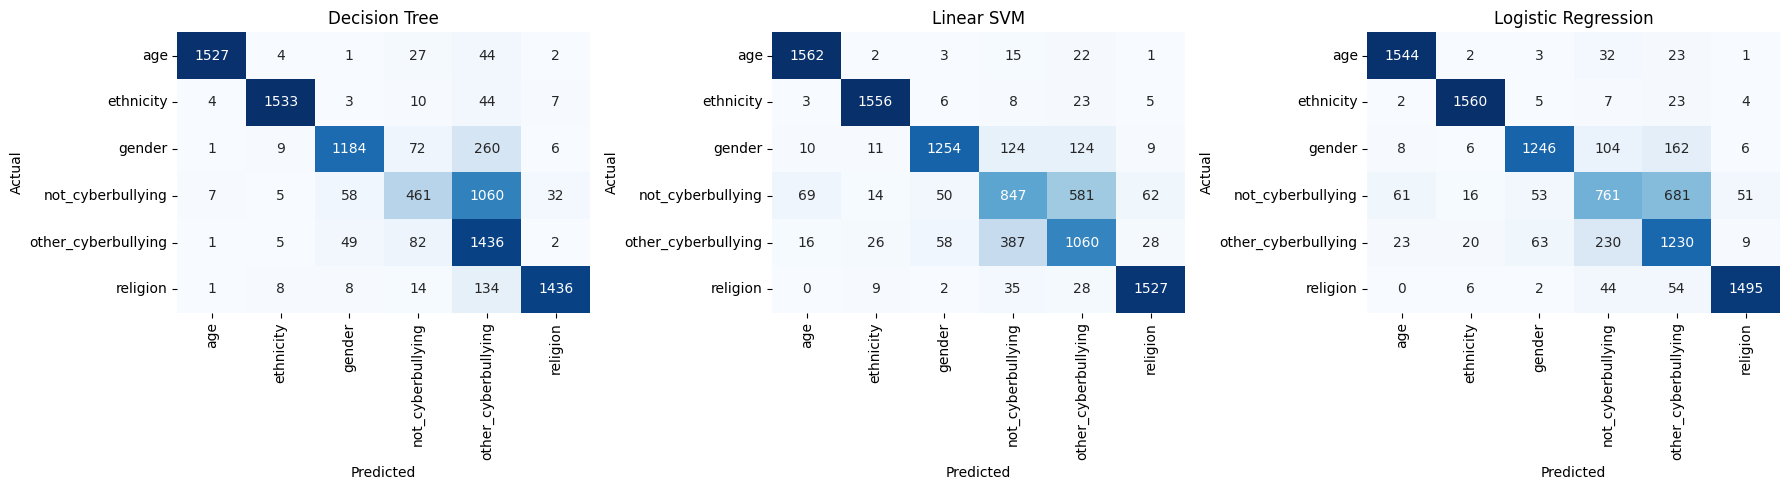

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare confusion matrices for plotting
confusion_matrices = {}
class_labels = np.unique(y2_test)

for model_name, result in results.items():
    cm = result['confusion_matrix']  # ✅ fix here
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    confusion_matrices[model_name] = cm_df

# Plot side-by-side
print("\n--- Compare Confusion Matrices ---")
plt.figure(figsize=(18, 5))

for i, (model_name, cm_df) in enumerate(confusion_matrices.items()):
    plt.subplot(1, len(confusion_matrices), i + 1)
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
# plt.savefig('v2_confusion_matrices.png', transparent=True)
plt.show()

## CNN Model Training

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [22]:
# 1. Prepare the text and labels
texts = cbt_df['clean_tweet'].tolist()
labels = cbt_df['cyberbullying_type']

# 2. Encode labels (multi-class, one-hot)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_onehot = to_categorical(y_encoded)  # Shape: (n_samples, 6)

# 3. Tokenize and pad the text
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>") #shows words output more then 10000 times, less then 10000 times will be OOV(out of vocabulary) 
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)

# 4. Train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# 5. Build the CNN model
num_classes = y_onehot.shape[1]

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# 7. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")


Epoch 1/5


/opt/homebrew/Caskroom/miniconda/base/envs/ai/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.6559 - loss: 0.8522 - val_accuracy: 0.8237 - val_loss: 0.4194
Epoch 2/5
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.8468 - loss: 0.3821 - val_accuracy: 0.8294 - val_loss: 0.4122
Epoch 3/5
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.8670 - loss: 0.3282 - val_accuracy: 0.8287 - val_loss: 0.4203
Epoch 4/5
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.8834 - loss: 0.2792 - val_accuracy: 0.8219 - val_loss: 0.4615
Epoch 5/5
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.8958 - loss: 0.2544 - val_accuracy: 0.8179 - val_loss: 0.4895
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8216 - loss: 0.4849

✅ Test Accuracy: 0.8179


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,192,084 (8.36 MB)

 Trainable params: 730,694 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,461,390 (5.57 MB)

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


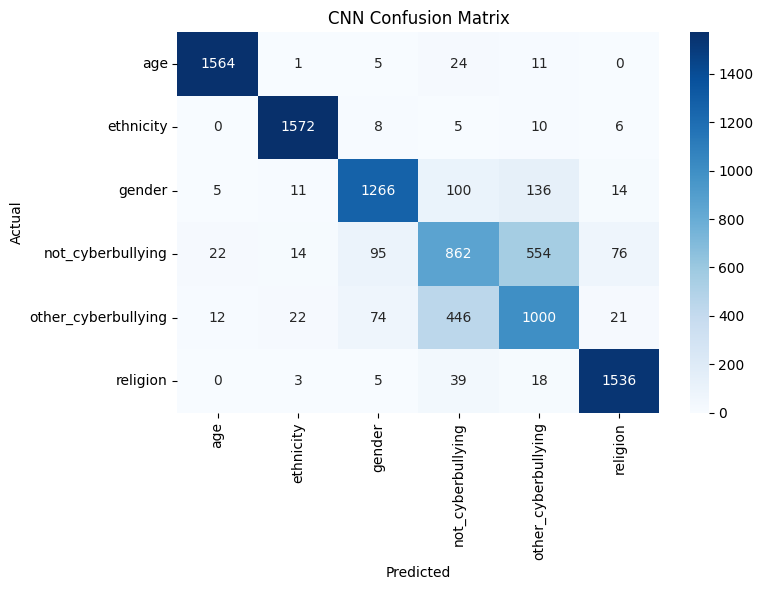


Classification Report:

                     precision    recall  f1-score   support

                age       0.98      0.97      0.98      1605
          ethnicity       0.97      0.98      0.98      1601
             gender       0.87      0.83      0.85      1532
  not_cyberbullying       0.58      0.53      0.56      1623
other_cyberbullying       0.58      0.63      0.61      1575
           religion       0.93      0.96      0.94      1601

           accuracy                           0.82      9537
          macro avg       0.82      0.82      0.82      9537
       weighted avg       0.82      0.82      0.82      9537



In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict class indices (not one-hot)
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')

plt.tight_layout()
# plt.savefig('cnn_confusion_matrices.png', transparent=True)
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

## Addition word cloud plots

In [25]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [26]:
cbt_df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [27]:
text_all = ", ".join(texts)

not_cyber =  cbt_df[cbt_df['cyberbullying_type'] == 'not_cyberbullying']
text_notcyber = ", ".join(not_cyber['clean_tweet'])

gender = cbt_df[cbt_df['cyberbullying_type'] == 'gender']
text_gender = ", ".join(gender['clean_tweet'])

religion = cbt_df[cbt_df['cyberbullying_type'] == 'religion']
text_religion = ", ".join(religion['clean_tweet'])

other_cyberbullying = cbt_df[cbt_df['cyberbullying_type'] == 'other_cyberbullying']
text_other = ", ".join(other_cyberbullying['clean_tweet'])

age = cbt_df[cbt_df['cyberbullying_type'] == 'age']
text_age = ", ".join(age['clean_tweet'])

ethnicity = cbt_df[cbt_df['cyberbullying_type'] == 'ethnicity']
text_ethnicity = ", ".join(ethnicity['clean_tweet'])


In [30]:
def wordcloud_t(text,name = 'name'):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(name)
    plt.show()

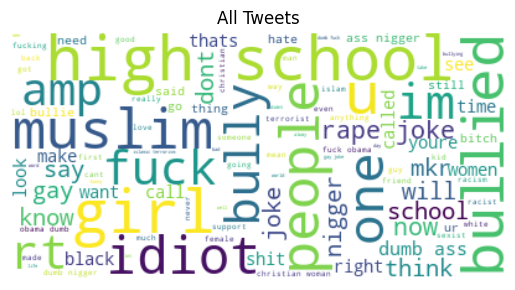

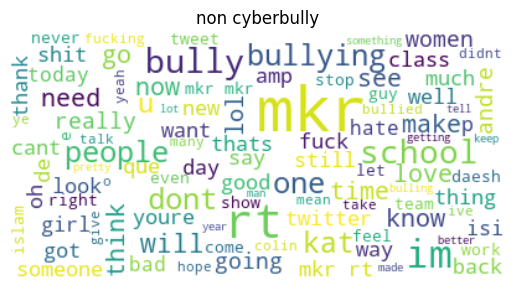

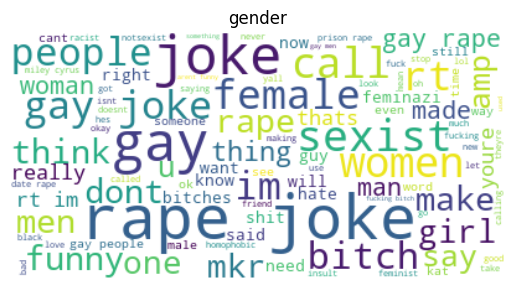

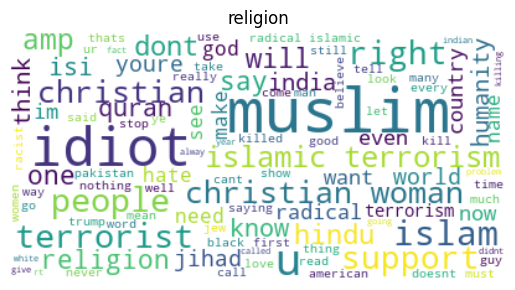

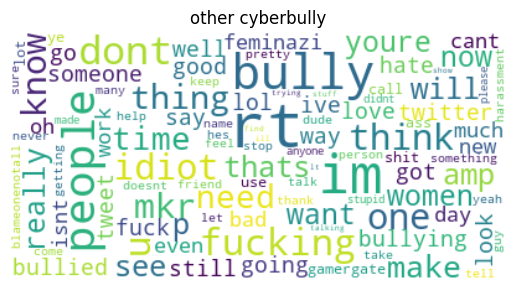

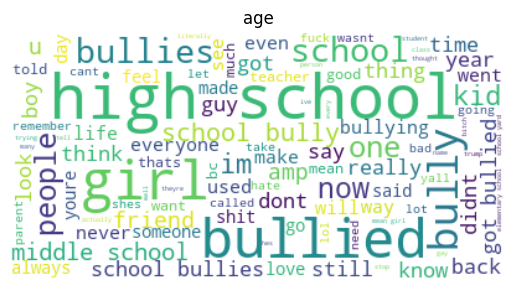

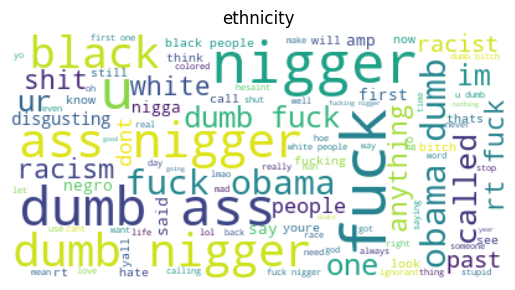

In [31]:
wordcloud_t(text_all, 'All Tweets')
wordcloud_t(text_notcyber, 'non cyberbully')
wordcloud_t(text_gender, 'gender')
wordcloud_t(text_religion, 'religion')
wordcloud_t(text_other, 'other cyberbully')
wordcloud_t(text_age, 'age')
wordcloud_t(text_ethnicity, 'ethnicity')